## image manipulations with Numpy

- image manipulations are done with numpy as part of practicing this library
- matplotlib is used as a means to quickly visualize the results in this notebook
- this notebook uses the image_manipulation library I created which is stored in ../packages folder in this project, it is imported as IM
- the PIL library is only used to get the picture from the file system

##### importing the used libraries

In [10]:
import sys
sys.path.append('../packages')
from image_manipulations import image_manipulations as IM
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### retrieve picture from filesystem
- get picture, use the full path or relative path to this notebook
- I placed mine in the data/images folder of this project
- paste or type the path in the input field

In [11]:
# example '../data/images/full_dulle.jpeg'
prentje = Image.open(input('geef het path naar de afbeelding '))

geef het path naar de afbeelding  ../data/images/full_dulle.jpeg


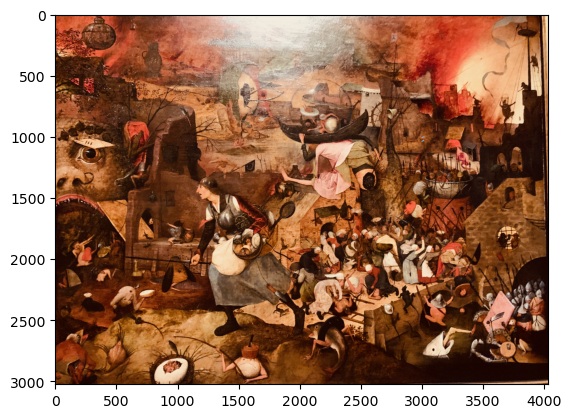

In [12]:
# check what the image is
np_image = np.array(prentje)
plt.imshow(np_image)
plt.show()

##### basic manipulations
- select a part of the image with function plaatje_knippen
- the picture can be scaled down with function plaatje_schalen, this uses the PIL library
- the picture can also be scaled down with numpy, that is the function plaatje_schalen_numpy, this takes as arguments the picture you want to scale down and the word 'groter' or "kleiner'
- a border can be added around the picture with function randje_maken

In [14]:
# example: geknipt_patroon = IM.plaatje_knippen(np_image,1200,2650,1000,2050)
# plt.imshow(geknipt_patroon)
# plt.show()

geknipt_patroon = IM.plaatje_knippen(np_image,1200,2650,1000,2050)

In [5]:
# scaling via PIL library, pass in the picture that you want to scale and give a number. this number is a %.
# so passing 20 will result in a picture that is 20% of the original size.  120 on the other hand will make it 20% larger than the original

# example geschaald_patroon = IM.plaatje_schalen(geknipt_patroon,50)
# plt.imshow(geschaald_patroon)
# plt.show()
geschaald_patroon = IM.plaatje_schalen(geknipt_patroon,50)

In [18]:
# scaling with numpy, pass the picture together with 'groter' or 'kleiner' this will result in a resize by factor 2 greater or smaller.
# passing the number value will result in a multiplication of the resize, so a 2 will result in a picture that is 4 times larger or 4 times smaller
# geschaald_patroon_numpy = IM.plaatje_schalen_numpy(geknipt_patroon,'kleiner')
# plt.imshow(geschaald_patroon_numpy)
# plt.show()

geschaald_patroon_numpy = IM.plaatje_schalen_numpy(geknipt_patroon,'kleiner')

In [19]:
# here you can pass the scaled result via the PIL or numpy function
# geschaald_met_rand = IM.randje_maken(geschaald_patroon,40)
# geschaald_met_rand = IM.randje_maken(geschaald_patroon_numpy,40)
# plt.imshow(geschaald_met_rand)
# plt.show()
geschaald_met_rand = IM.randje_maken(geschaald_patroon_numpy,40)
#geknipt_met_rand = IM.randje_maken(geknipt_patroon,100)

##### coloring and designing a pattern
- in this next step we create a wallpaper that is a combination of flipping the images and coloring each row
- this is done by the flexibel_met_kleuren_breien_en_richtingen function, it takes in the following arguments:
- the picture, in my example I use the plaatje_met_rand
- the number of repetitions
- and then for each of the orientations you can specify 0 which will supress the line or 1 for keeping the original colour  or 'R' or 'G' or 'B' for red, green blue.
- there are 4 orientations: normal = '0' , mirrored 'H' , reversed 'V'  and mirrored & reversed 'SV'

[]

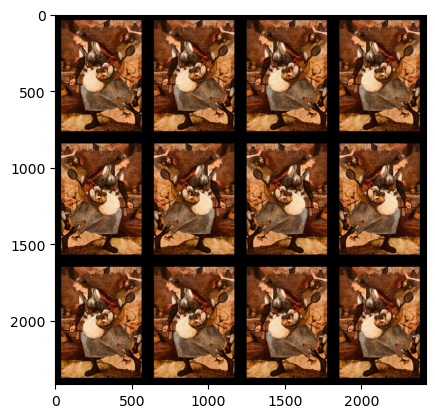

In [10]:
# in this example, the arguments passed are the picture, 4 repetitions
# first pair: 1,'0' which will give a original coloured, original orientation
# second pair: 1, 'H' is original colour and mirrored image
# third pair: 1, '0' will repeat the first line
# fourth pair will repeat the pattern en orientation of the 2nd line
patroon_via_tile = IM.flexibel_met_kleuren_en_richtingen_breien(geschaald_met_rand,4,
                                                             1,'0',
                                                             1,'H',
                                                             1, '0',
                                                             0, 'SV')
plt.imshow(patroon_via_tile)
plt.plot()

[]

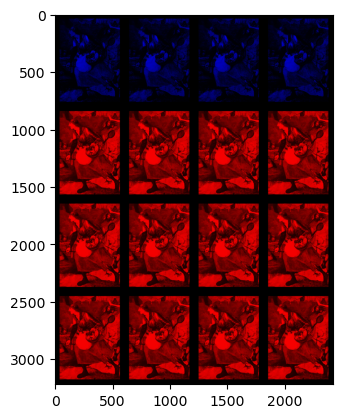

In [14]:
# in this example, the arguments passed are the picture, 4 repetitions
# first pair: 'B','0' which will give a blue coloured, original orientation line of 4 images
# second pair: 'R', '0' is red colour and original orientation line of 4 images
# third pair: 'R', '0' is red colour and original orientation line of 4 images
# fourth pair 'G', '0' will give a green colour original orientation line of 4 images
gekleurd_patroon_via_tile = IM.flexibel_met_kleuren_en_richtingen_breien(geschaald_met_rand,4,
                                                             'B','0',
                                                             'R','0',
                                                             'R', '0',
                                                             'R', '0')
plt.imshow(gekleurd_patroon_via_tile)
plt.plot()

[]

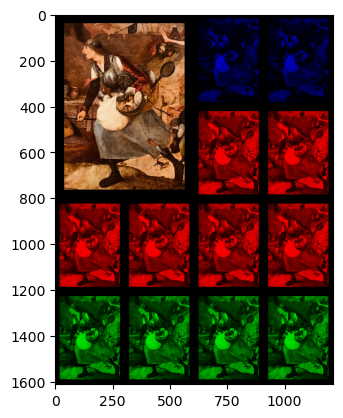

In [21]:
# stiching different patterns together:
# in this case there is not yet taken into account that dimensions can be of different size,
# so we depend on having a x1 and x2 be exactly that, if dimensions differ an error will appear
# you pass the picture that needs stitching and as extra argument 
# you can give following parameter BL BR ML MR OL OR this results in the larger picture being stitched in that position, so BL is boven links and so on
# any other combination will result in the larger picture being centered in the middle
plt.imshow(IM.flexibel_breien(geschaald_met_rand,'BL'))
plt.plot()

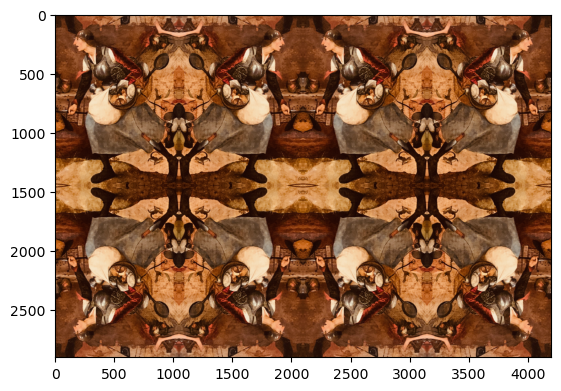

In [15]:
# extraatje, just try, hieronder kan je kiezen of je de originele afbeelding
# prentje = np_image.copy()
prentje = geknipt_patroon.copy()
prentje_horizontaal_flip = prentje[:,::-1,:]
prentje_verticaal_flip = prentje[::-1,:,:]
prentje_horiz_verti_flip=prentje_verticaal_flip[:,::-1,:]
samengevoegd_horizontaal = np.concatenate((prentje,prentje_horizontaal_flip, prentje,prentje_horizontaal_flip),axis=1)
samengevoegd_verticaal = np.concatenate((prentje_verticaal_flip,prentje_horiz_verti_flip,prentje_verticaal_flip,prentje_horiz_verti_flip),axis=1)
samengevoegd = np.concatenate((samengevoegd_horizontaal,samengevoegd_verticaal),axis=0)
plt.imshow(samengevoegd)
plt.show()